In [1]:
import numpy as np

In [2]:
x1 = [4,8,11,7]
x2 = [13,4,5,14]

In [11]:
mean_x1 = np.mean(x1)
mean_x2 = np.mean(x2)
print('Mean of x1 is :',mean_x1,'\n','Mean of x2 is :',mean_x2)

Mean of x1 is : 7.5 
 Mean of x2 is : 9.0


In [3]:
cov = np.cov(x1,x2)
cov

array([[  8.33333333, -11.        ],
       [-11.        ,  27.33333333]])

In [7]:
eig_val,eig_vectors = np.linalg.eig(cov)
print('Eigen_values :','\n',eig_val)
print('\n')
print('Eigen_vectors :','\n',eig_vectors)

Eigen_values : 
 [ 3.29889148 32.36777519]


Eigen_vectors : 
 [[-0.9092909  0.4161611]
 [-0.4161611 -0.9092909]]


In [19]:
data1 = []
for i in range(len(x1)):
    data1.append(x1[i]-mean_x1)
print(data1)

[-3.5, 0.5, 3.5, -0.5]


In [20]:
data2 = []
for i in range(len(x2)):
    data2.append(x2[i]-mean_x2)
print(data2)

[4.0, -5.0, -4.0, 5.0]


In [21]:
arr = np.array([data1,data2])
arr

array([[-3.5,  0.5,  3.5, -0.5],
       [ 4. , -5. , -4. ,  5. ]])

In [23]:
PCA1 = eig_vectors[0]@arr
PCA1

array([ 4.84716256, -2.53545097, -4.84716256,  2.53545097])

In [25]:
PCA2 = eig_vectors[1]@arr
PCA2

array([-2.18059972,  4.33837393,  2.18059972, -4.33837393])

In [26]:
from sklearn.datasets import load_digits

In [27]:
my_data = load_digits()

In [29]:
print(my_data.DESCR)

.. _digits_dataset:

Optical recognition of handwritten digits dataset
--------------------------------------------------

**Data Set Characteristics:**

:Number of Instances: 1797
:Number of Attributes: 64
:Attribute Information: 8x8 image of integer pixels in the range 0..16.
:Missing Attribute Values: None
:Creator: E. Alpaydin (alpaydin '@' boun.edu.tr)
:Date: July; 1998

This is a copy of the test set of the UCI ML hand-written digits datasets
https://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits

The data set contains images of hand-written digits: 10 classes where
each class refers to a digit.

Preprocessing programs made available by NIST were used to extract
normalized bitmaps of handwritten digits from a preprinted form. From a
total of 43 people, 30 contributed to the training set and different 13
to the test set. 32x32 bitmaps are divided into nonoverlapping blocks of
4x4 and the number of on pixels are counted in each block. This generates
an in

In [35]:
import pandas as pd
features = pd.DataFrame(my_data.data,columns=my_data.feature_names)
features.head()

,pixel_0_0,pixel_0_1,pixel_0_2,pixel_0_3,pixel_0_4,pixel_0_5,pixel_0_6,pixel_0_7,pixel_1_0,pixel_1_1,pixel_1_2,pixel_1_3,pixel_1_4,pixel_1_5,pixel_1_6,pixel_1_7,pixel_2_0,pixel_2_1,pixel_2_2,pixel_2_3,pixel_2_4,pixel_2_5,pixel_2_6,pixel_2_7,pixel_3_0,pixel_3_1,pixel_3_2,pixel_3_3,pixel_3_4,pixel_3_5,pixel_3_6,pixel_3_7,pixel_4_0,pixel_4_1,pixel_4_2,pixel_4_3,pixel_4_4,pixel_4_5,pixel_4_6,pixel_4_7,pixel_5_0,pixel_5_1,pixel_5_2,pixel_5_3,pixel_5_4,pixel_5_5,pixel_5_6,pixel_5_7,pixel_6_0,pixel_6_1,pixel_6_2,pixel_6_3,pixel_6_4,pixel_6_5,pixel_6_6,pixel_6_7,pixel_7_0,pixel_7_1,pixel_7_2,pixel_7_3,pixel_7_4,pixel_7_5,pixel_7_6,pixel_7_7
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,13.0,15.0,10.0,15.0,5.0,0.0,0.0,3.0,15.0,2.0,0.0,11.0,8.0,0.0,0.0,4.0,12.0,0.0,0.0,8.0,8.0,0.0,0.0,5.0,8.0,0.0,0.0,9.0,8.0,0.0,0.0,4.0,11.0,0.0,1.0,12.0,7.0,0.0,0.0,2.0,14.0,5.0,10.0,12.0,0.0,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,0.0,11.0,16.0,9.0,0.0,0.0,0.0,0.0,3.0,15.0,16.0,6.0,0.0,0.0,0.0,7.0,15.0,16.0,16.0,2.0,0.0,0.0,0.0,0.0,1.0,16.0,16.0,3.0,0.0,0.0,0.0,0.0,1.0,16.0,16.0,6.0,0.0,0.0,0.0,0.0,1.0,16.0,16.0,6.0,0.0,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,3.0,16.0,15.0,14.0,0.0,0.0,0.0,0.0,8.0,13.0,8.0,16.0,0.0,0.0,0.0,0.0,1.0,6.0,15.0,11.0,0.0,0.0,0.0,1.0,8.0,13.0,15.0,1.0,0.0,0.0,0.0,9.0,16.0,16.0,5.0,0.0,0.0,0.0,0.0,3.0,13.0,16.0,16.0,11.0,5.0,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,13.0,6.0,15.0,4.0,0.0,0.0,0.0,2.0,1.0,13.0,13.0,0.0,0.0,0.0,0.0,0.0,2.0,15.0,11.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,12.0,12.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,10.0,8.0,0.0,0.0,0.0,8.0,4.0,5.0,14.0,9.0,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,0.0,7.0,8.0,0.0,0.0,0.0,0.0,0.0,1.0,13.0,6.0,2.0,2.0,0.0,0.0,0.0,7.0,15.0,0.0,9.0,8.0,0.0,0.0,5.0,16.0,10.0,0.0,16.0,6.0,0.0,0.0,4.0,15.0,16.0,13.0,16.0,1.0,0.0,0.0,0.0,0.0,3.0,15.0,10.0,0.0,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0


In [40]:
target = pd.DataFrame(my_data.target,columns=['Target'])
target.head()

,Target
0,0
1,1
2,2
3,3
4,4


In [41]:
import matplotlib.pyplot as plt

In [63]:
img = features.loc[3].values.reshape(8,8)

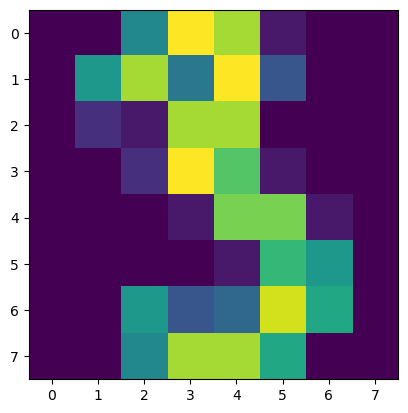

In [64]:
plt.imshow(img)

In [89]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [90]:
x_train,x_test,y_train,y_test = train_test_split(features,target,train_size=0.75,random_state=100)

In [91]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(1347, 64)
(450, 64)
(1347, 1)
(450, 1)


1.Build a model to classify the image data.Apply PCA for dimensionality reduction

In [92]:
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression

In [126]:
pca = PCA(n_components=10)

In [127]:
pca.fit(x_train)
pca.fit(x_test)

PCA(n_components=10)

In [128]:
x_train_new = pca.transform(x_train)
x_test_new = pca.transform(x_test)

In [129]:
print(x_train_new.shape)
print(x_test_new.shape)

(1347, 10)
(450, 10)


In [130]:
log_model = LogisticRegression(multi_class='ovr')
import warnings
warnings.filterwarnings('ignore')

In [131]:
log_model.fit(x_train_new,y_train)

LogisticRegression(multi_class='ovr')

In [132]:
y_pred = log_model.predict(x_test_new)

In [133]:
accuracy_score(y_test,y_pred)

0.9222222222222223

In [134]:
pca.explained_variance_ratio_

array([0.15632758, 0.15039126, 0.1133261 , 0.07570252, 0.05961894,
       0.04960901, 0.04373182, 0.03704573, 0.03426341, 0.02847265])